In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
text_color = 'black'
mpl.rcParams['font.weight']='bold'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Calibri'
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

from adjustText import adjust_text
from highlight_text import ax_text,fig_text

In [3]:
df = pd.read_csv('Miscstats.csv', index_col='Rk')

In [4]:
df = df[(df['90s']>=5) & (df['Fls']>=15)]

In [5]:
q2_cards = (df['CrdY']/df['90s']).quantile(0.5)
q2_fls = (df['Fls']/df['90s']).quantile(0.5)
df['YCardsper90'] = df['CrdY']/df['90s']
df['Flsper90'] = df['Fls']/df['90s']

In [6]:
q3_cards = df['YCardsper90'].quantile(0.75)
q1_cards = df['YCardsper90'].quantile(0.25)

q3_fls = df['Flsper90'].quantile(0.75)
q1_fls = df['Flsper90'].quantile(0.25)

outlier_top_cards = q3_cards + (q3_cards - q1_cards)
outlier_top_fls = q3_fls + (q3_fls - q1_fls)

In [7]:
df = df.drop_duplicates()

Text(0.2, 0.1, 'MEDIAN\n  VALUE')

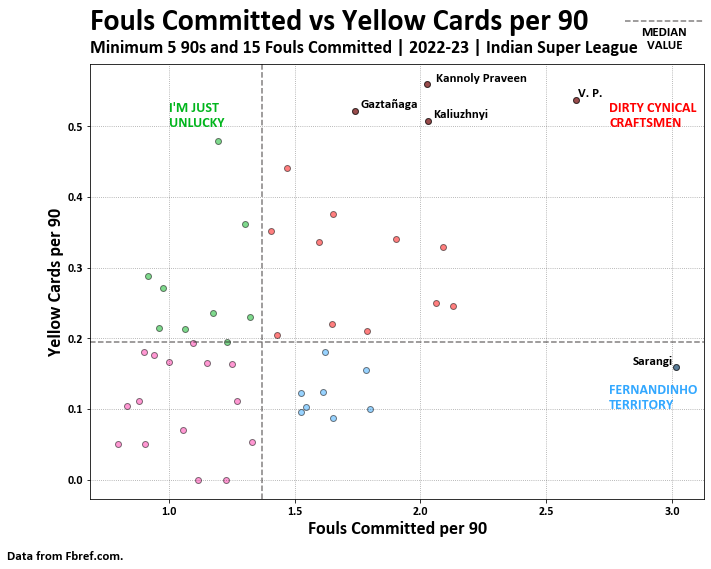

In [9]:
fig, ax = plt.subplots(figsize=(11,8))

# SETTING UP GRID
ax.grid(True, ls=':', alpha=0.4, color='black')
ax.axhline(q2_cards, c='#2D2828', alpha=0.6, ls='--')
ax.axvline(q2_fls, c='#2D2828', alpha=0.6, ls='--')

# UPPER RIGHT
df_fil = df[(df['YCardsper90']>q2_cards) & (df['Flsper90']>q2_fls)]
x, y = (df_fil['Fls']/df_fil['90s']).tolist(), (df_fil['CrdY']/df_fil['90s']).tolist()
ax.scatter(x, y, c='red', alpha=0.5, edgecolor='black')
ax.text(2.75,0.5,'DIRTY CYNICAL\nCRAFTSMEN', c='red', size=14)

# UPPER LEFT
df_fil = df[(df['YCardsper90']>q2_cards) & (df['Flsper90']<=q2_fls)]
x, y = (df_fil['Fls']/df_fil['90s']).tolist(), (df_fil['CrdY']/df_fil['90s']).tolist()
ax.scatter(x, y,c='#00B51C', alpha=0.5, edgecolor='black')
ax.text(1,0.5,'I\'M JUST\nUNLUCKY', c='#00B51C', size=14)

# LOWER RIGHT
df_fil = df[(df['YCardsper90']<=q2_cards) & (df['Flsper90']>q2_fls)]
x, y = (df_fil['Fls']/df_fil['90s']).tolist(), (df_fil['CrdY']/df_fil['90s']).tolist()
ax.scatter(x, y,c='#33A8FF', alpha=0.5, edgecolor='black')
ax.text(2.75,0.1,'FERNANDINHO\nTERRITORY', c='#33A8FF', size=14)

# LOWER LEFT
df_fil = df[(df['YCardsper90']<=q2_cards) & (df['Flsper90']<=q2_fls)]
x, y = (df_fil['Fls']/df_fil['90s']).tolist(), (df_fil['CrdY']/df_fil['90s']).tolist()
ax.scatter(x, y, c='#FF33A8', alpha=0.5, edgecolor='black')


#TEXT
texts = []
for x, y, s in zip(df['Flsper90'], df['YCardsper90'], df['Player']):
    if len(s.split())==1:
        name = s
    else:
        name = ' '.join(s.split()[1:])
    if x>outlier_top_fls or y>outlier_top_cards:
        ax.scatter(x, y, c='black', alpha = 0.4)
        texts.append(ax.text(x, y, name, fontdict=dict(color='black', size=13)))
        
adjust_text(texts,force_points=0.2, force_text=0.2,
            expand_points=(1.2, 1.2), expand_text=(1, 1),
            arrowprops=dict(arrowstyle = '-', lw=0.1, alpha = 0))


# TITLES AND LABELS
fig.text(0.125,0.94,'Fouls Committed vs Yellow Cards per 90', size = 30, weight='heavy')
fig.text(0.125,0.90,'Minimum 5 90s and 15 Fouls Committed | 2022-23 | Indian Super League', size = 18)
ax.set_xlabel('Fouls Committed per 90', size=18, weight='bold')
ax.set_ylabel('Yellow Cards per 90', size=18, weight='bold')

fig.text(0.02,0.02,'Data from Fbref.com.', size=13)

ax = fig.add_axes([0.8,0.9,0.1,0.08])
ax.axis('off')
ax.axhline(0.7,c='#2D2828', alpha=0.6, ls='--')
ax.text(0.2,0.1,'MEDIAN\n  VALUE', size=13)
